In [ ]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# convert to datetime
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [ ]:
df_id = df[df.job_country == "Indonesia"].copy()

In [ ]:
df_id['job_posted_month'] = df_id['job_posted_date'].dt.strftime('%B')

df_id

In [ ]:
df_id_pivot = df_id.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size') # create pivot table

In [ ]:
df_id_pivot.reset_index(inplace=True) # reset index to make job_posted_month a column again

df_id_pivot['month_number'] = pd.to_datetime(df_id_pivot['job_posted_month'], format='%B').dt.month # create month_number column for sorting

In [ ]:
df_id_pivot.sort_values('month_number', inplace=True) # sort by month_number
df_id_pivot.set_index('job_posted_month', inplace=True) # set job_posted_month as index

In [ ]:
df_id_pivot.drop(columns='month_number', inplace=True) # drop month_number column after sorting

In [27]:
top_3_job = df_id['job_title_short'].value_counts().head(3).index # get top 3 job titles

In [28]:
df_id_pivot = df_id_pivot[top_3_job] # filter pivot table to only include top 3 job titles

In [29]:
df_id_pivot

job_title_short,Data Engineer,Data Scientist,Data Analyst
job_posted_month,,,
January,117,80,35
February,78,44,25
March,90,36,21
April,46,28,20
May,79,39,25
June,66,32,22
July,58,46,25
August,78,46,32
September,83,50,34


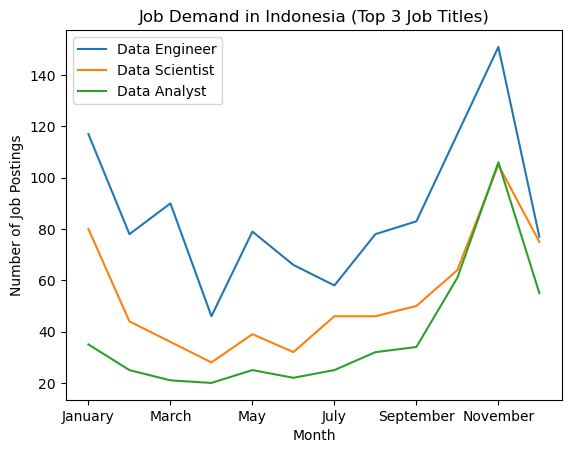

In [31]:
df_id_pivot.plot(kind='line')
plt.title('Job Demand in Indonesia (Top 3 Job Titles)')
plt.xlabel('Month')
plt.ylabel('Number of Job Postings')
plt.legend()
plt.show()